In [23]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [24]:
app_train = pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')

bureau_balance = pd.read_csv('bureau_balance.csv')
bureau = pd.read_csv('bureau.csv')
credit_card_balance = pd.read_csv('credit_card_balance.csv')
installments = pd.read_csv('installments_payments.csv')
pos_cash = pd.read_csv('POS_CASH_balance.csv')


In [25]:
#group by bureau balance 
bureau_balance_agg=bureau_balance.groupby(['SK_ID_BUREAU']).agg({
    'MONTHS_BALANCE' : 'mean',
    'STATUS' : 'first'}).reset_index()

In [26]:
#divide status in bureau_balance to 0 and 1 
map_status = {'C' :1,
              'X' :1,
              '0' :1,
              '1' :0,
              '2' :0,
              '3' :0,
              '4' :0,
              '5' :0}
bureau_balance_agg['STATUS'] = bureau_balance_agg['STATUS'].map(map_status)
bureau_balance_agg['STATUS'].value_counts()


STATUS
1    809934
0      7461
Name: count, dtype: int64

In [27]:
#merge bureau with bureau balance 
df_bureau = bureau.merge(bureau_balance_agg,how='inner',on=['SK_ID_BUREAU'])
df_bureau.head()

df_bureau_agg=df_bureau.groupby(['SK_ID_CURR']).agg({
    'SK_ID_BUREAU' : 'first',
    'CREDIT_ACTIVE': 'last',
    'CREDIT_CURRENCY' : 'last',
    'DAYS_CREDIT' : 'median',
    'CREDIT_DAY_OVERDUE' : 'median',
    'DAYS_CREDIT_ENDDATE' : 'median',
    'DAYS_ENDDATE_FACT' : 'median',
    'AMT_CREDIT_MAX_OVERDUE' :'median',
    'CNT_CREDIT_PROLONG' : 'median',
    'AMT_CREDIT_SUM' : 'median',
    'AMT_CREDIT_SUM_DEBT' : 'median',
    'AMT_CREDIT_SUM_LIMIT': 'median',
    'AMT_CREDIT_SUM_OVERDUE' :'median',
    'CREDIT_TYPE': 'last',
    'DAYS_CREDIT_UPDATE' : 'median',
    'AMT_ANNUITY' : 'median',
    'MONTHS_BALANCE' : 'median',
    'STATUS': 'first'
}).reset_index()

df_bureau_agg.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS
0,100001,5896630,Active,currency 1,-857.0,0.0,-179.0,-715.0,NaN,0.0,168345.0,0.00,0.0,0.0,Consumer credit,-155.0,0.0,-14.00,1
1,100002,6158904,Closed,currency 1,-1042.5,0.0,-424.5,-939.0,40.5,0.0,54130.5,0.00,0.0,0.0,Credit card,-402.5,0.0,-26.00,1
2,100005,6735200,Active,currency 1,-137.0,0.0,122.0,-123.0,0.0,0.0,58500.0,25321.50,0.0,0.0,Consumer credit,-31.0,0.0,-2.00,1
3,100010,5576630,Closed,currency 1,-1939.5,0.0,-119.5,-1138.0,NaN,0.0,495000.0,174003.75,0.0,0.0,Loan for business development,-578.0,NaN,-46.00,1
4,100013,5922083,Closed,currency 1,-1835.0,0.0,-999.0,-1168.0,19305.0,0.0,391770.0,0.00,NaN,0.0,Car loan,-882.0,0.0,-29.75,1


In [28]:
df_app_train = app_train.merge(df_bureau_agg, how='inner', on='SK_ID_CURR')
df_app_test  = app_test.merge(df_bureau_agg, how='inner',on ='SK_ID_CURR') 

In [29]:
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y,MONTHS_BALANCE,STATUS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,54130.5,0.00,0.0,0.0,Credit card,-402.5,0.0,-26.0,1
1,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.0,495000.0,174003.75,0.0,0.0,Loan for business development,-578.0,NaN,-46.0,1
2,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,0.0,360000.0,122735.07,135000.0,0.0,Consumer credit,-26.5,27000.0,-8.0,1
3,100032,0,Cash loans,M,N,Y,1,112500.0,327024.0,23827.5,...,0.0,331875.0,0.00,0.0,0.0,Consumer credit,-520.5,17437.5,-29.0,1
4,100033,0,Cash loans,M,Y,Y,0,270000.0,790830.0,57676.5,...,0.0,675000.0,0.00,0.0,0.0,Credit card,-169.0,NaN,-3.0,1


In [30]:
print(app_train.TARGET.value_counts())

TARGET
0    282686
1     24825
Name: count, dtype: int64


In [31]:
def func_info(data):

    list_column =[]
    list_type   =[]
    list_len    =[] 
    list_null   =[]
    list_persen_null =[]
    list_value_count = []
    list_len_unique=[]

    for column in data.columns:

        column_name = column
        column_type = data[column].dtype
        column_len  = data[column].notnull().sum()
        column_null = data[column].isnull().sum()
        column_persen = round(column_null/data.shape[0] *100,2)

        list_column.append(column_name)
        list_type.append(column_type)
        list_len.append(column_len)
        list_null.append(column_null)
        list_persen_null.append(column_persen)

    df_info = pd.DataFrame({'column' : list_column,
                          'dtype'  : list_type,
                          'length' : list_len,
                          'null_count': list_null,
                          'null_percents': list_persen_null})
    
    for index,row in df_info.iterrows() :
        if row['dtype'] == 'object':
            value_count = data[row.column].value_counts().reset_index()
            value_count = value_count.values.tolist()
            len_unique = len(value_count)
        else:
            value_count = None
            len_unique = None

        list_value_count.append(value_count)
        list_len_unique.append(len_unique)

    df_info['value_count'] = list_value_count
    df_info['len_unique'] = list_len_unique
    
    return df_info

In [32]:
info_train = func_info(df_app_train)
info_test = func_info(df_app_test)

#info_train_sort = info_train[(info_train.null_count>0)].sort_values(by = 'null_count',ascending=False)
#info_test_sort  = info_test[(info_test.null_count>0)].sort_values(by='null_count',ascending=False)

print('---------------------info_train--------------')
display(info_train.head())
print('---------------------info_test--------------')
display(info_test.head())

---------------------info_train--------------


,column,dtype,length,null_count,null_percents,value_count,len_unique
0,SK_ID_CURR,int64,92231,0,0.0,None,NaN
1,TARGET,int64,92231,0,0.0,None,NaN
2,NAME_CONTRACT_TYPE,object,92231,0,0.0,"[[Cash loans, 91849], [Revolving loans, 382]]",2.0
3,CODE_GENDER,object,92231,0,0.0,"[[F, 59935], [M, 32296]]",2.0
4,FLAG_OWN_CAR,object,92231,0,0.0,"[[N, 58979], [Y, 33252]]",2.0


---------------------info_test--------------


,column,dtype,length,null_count,null_percents,value_count,len_unique
0,SK_ID_CURR,int64,42311,0,0.0,None,NaN
1,NAME_CONTRACT_TYPE,object,42311,0,0.0,"[[Cash loans, 41933], [Revolving loans, 378]]",2.0
2,CODE_GENDER,object,42311,0,0.0,"[[F, 28763], [M, 13548]]",2.0
3,FLAG_OWN_CAR,object,42311,0,0.0,"[[N, 27674], [Y, 14637]]",2.0
4,FLAG_OWN_REALTY,object,42311,0,0.0,"[[Y, 29253], [N, 13058]]",2.0


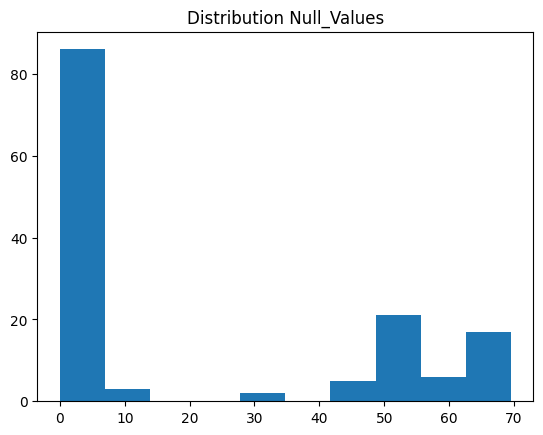

In [33]:
plt.hist(info_train.null_percents)
plt.title('Distribution Null_Values')
plt.show()


In [34]:
#delete some column that has null_percent more than 5 percent 
first_filter_column = info_train[info_train['null_percents'] < 5]
#delete column object that too long unique value
second_filter_column = first_filter_column[~((first_filter_column['dtype'] == 'object') &
                        (first_filter_column.len_unique > 5))]

#df_app_train temporary selected column
df_app_train_selected = df_app_train[second_filter_column['column'].values.tolist()]
df_app_train_selected.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,STATUS
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-1042.5,0.0,-424.5,0.0,54130.5,0.00,0.0,-402.5,-26.0,1
1,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,-1939.5,0.0,-119.5,0.0,495000.0,174003.75,0.0,-578.0,-46.0,1
2,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,-495.0,0.0,5441.0,0.0,360000.0,122735.07,0.0,-26.5,-8.0,1
3,100032,0,Cash loans,M,N,Y,1,112500.0,327024.0,23827.5,...,-1169.5,0.0,-624.0,0.0,331875.0,0.00,0.0,-520.5,-29.0,1
4,100033,0,Cash loans,M,Y,Y,0,270000.0,790830.0,57676.5,...,-195.0,0.0,913.0,0.0,675000.0,0.00,0.0,-169.0,-3.0,1


# DUPLICATED DATA

In [35]:
n_duplicate = df_app_train_selected.duplicated().sum()
print('total data duplicate :' +str(n_duplicate))

total data duplicate :0


# FILL NA

In [36]:
#check how many columns that have null values
list_na = second_filter_column['column'][second_filter_column['null_count'] >0].values.tolist()
len_init = len(list_na)
for col in list_na:
    df_app_train_selected[col] = df_app_train_selected[col].fillna(df_app_train_selected[col].median()) 

df_app_train_selected_info = func_info(df_app_train_selected)
len_final = len(df_app_train_selected_info[df_app_train_selected_info['null_count'] > 0])
print('n_column that has null values before fillna :' + str(len_init) )
print('n_column that has null values after fillna  :'  + str(len_final) + '/no left')

n_column that has null values before fillna :9
n_column that has null values after fillna  :0/no left


# FEATURE EXTRACTION

In [37]:
#Name_Family_Status 
list_not_married = ['Single / not married','Separated','Widow']
list_married = ['Married','Civil marriage']
df_app_train_selected['NAME_FAMILY_STATUS'][df_app_train_selected['NAME_FAMILY_STATUS'].isin(list_married)] = 'Married'
df_app_train_selected['NAME_FAMILY_STATUS'][df_app_train_selected['NAME_FAMILY_STATUS'].isin(list_not_married)] = 'Single'

#Drop column CREDIT CURRENCY
#because doent have valuable information
df_app_train_selected = df_app_train_selected.drop('CREDIT_CURRENCY',axis=1)

df_app_train_selected['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         91849
Revolving loans      382
Name: count, dtype: int64

# FEATURE ENCODING
change column object data to one hot or label encoding 

In [38]:
#label encoding 
map_name_contract_type  = {'Cash loans':0,'Revolving loans':1}
map_code_gender         = {'F':0,'M':1}
map_flag_own_car        = {'N':0,'Y':1}
map_flag_own_realty     = {'N':0,'Y':1}
map_name_family_status  = {'Single':0, 'Married':1}

df_app_train_selected['NAME_CONTRACT_TYPE'] = df_app_train_selected['NAME_CONTRACT_TYPE'].map(map_name_contract_type)
df_app_train_selected['CODE_GENDER'] = df_app_train_selected['CODE_GENDER'].map(map_code_gender)
df_app_train_selected['FLAG_OWN_CAR'] = df_app_train_selected['FLAG_OWN_CAR'].map(map_flag_own_car)
df_app_train_selected['FLAG_OWN_REALTY'] = df_app_train_selected['FLAG_OWN_REALTY'].map(map_flag_own_realty)
df_app_train_selected['NAME_FAMILY_STATUS'] = df_app_train_selected['NAME_FAMILY_STATUS'].map(map_name_family_status)

#one_hot encoding
#income_type
for cat in ['NAME_INCOME_TYPE']:
    onehots = pd.get_dummies(df_app_train_selected[cat], prefix='income_type', drop_first = False)
    df_app_train_selected =  df_app_train_selected.join(onehots)
#education_type
for cat in ['NAME_EDUCATION_TYPE']:
    onehots = pd.get_dummies(df_app_train_selected[cat], prefix='education', drop_first = False)
    df_app_train_selected =  df_app_train_selected.join(onehots)
#credit_active
for cat in ['CREDIT_ACTIVE']:
    onehots = pd.get_dummies(df_app_train_selected[cat], prefix='credit', drop_first = False)
    df_app_train_selected =  df_app_train_selected.join(onehots)

df_app_train_selected.drop(['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','CREDIT_ACTIVE'],axis=1,inplace=True)

In [39]:
df_app_train_selected['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
1    69670
0    22561
Name: count, dtype: int64

# SPLIT DATA TO TRAIN AND TEST

In [40]:
from  sklearn.model_selection import train_test_split
no_use = ['SK_ID_CURR','TARGET']
X = df_app_train_selected.loc[:,~df_app_train_selected.columns.isin(no_use)]
y = df_app_train_selected['TARGET']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('len_x_train '+ str(len(x_train)))
print('len_x_test ' + str(len(x_test)))

len_x_train 73784
len_x_test 18447


# FEATURE TRANSFORMATION
feature transformation using standardScaler() 

In [41]:
#standarisasi
df_SS_train = x_train.copy()
df_SS_test = x_test.copy()

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_SS_train)
df_SS_train = scaler.transform(df_SS_train)
df_SS_test = scaler.transform(df_SS_test)
#mengubah dari list ke dalam bentuk data frame
df_x_train = pd.DataFrame(df_SS_train, columns = x_train.columns)
df_x_test = pd.DataFrame(df_SS_test, columns = x_test.columns)

# HANDLE CLASS IMBALANCE

In [43]:
#data distribution before imbalance treatment
print('before treatment')
print(y_train.value_counts())

before treatment
TARGET
0    67788
1     5996
Name: count, dtype: int64


In [44]:
#using oversampling-undersampling smotenn
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
model = SMOTE(random_state=42)
#model = SMOTEENN(sampling_strategy='minority', random_state=42)
x_balance, y_balance = model.fit_resample(df_x_train, y_train)


In [45]:
print('after treatment')
print(y_balance.value_counts())

after treatment
TARGET
0    67788
1    67788
Name: count, dtype: int64


# MODELLING 

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [47]:
X_train = x_balance
y_train = y_balance

X_test  = df_x_test
y_test  = y_test


## a) Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42) # inisiasi object dengan nama logreg
logreg.fit(X_train, y_train) # fit model regression dari data train
eval_classification(logreg)

Accuracy (Test Set): 0.65
Precision (Test Set): 0.14
Recall (Test Set): 0.62
F1-Score (Test Set): 0.23
roc_auc (test-proba): 0.69
roc_auc (train-proba): 0.72


## b) Adaboost Classifier

In [49]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train,y_train)
print(eval_classification(adaboost))

Accuracy (Test Set): 0.85
Precision (Test Set): 0.17
Recall (Test Set): 0.22
F1-Score (Test Set): 0.19
roc_auc (test-proba): 0.65
roc_auc (train-proba): 0.94
None


## c) Gradient Boosting Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=42)
GBC.fit(X_train,y_train)
print(eval_classification(GBC))

Accuracy (Test Set): 0.91
Precision (Test Set): 0.17
Recall (Test Set): 0.02
F1-Score (Test Set): 0.03
roc_auc (test-proba): 0.67
roc_auc (train-proba): 0.97
None


## d) Knn Classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print(eval_classification(knn))

Accuracy (Test Set): 0.62
Precision (Test Set): 0.11
Recall (Test Set): 0.49
F1-Score (Test Set): 0.17
roc_auc (test-proba): 0.57
roc_auc (train-proba): 1.00
None


# FEATURE IMPORTANCE

                             Feature  Importance
23       REGION_RATING_CLIENT_W_CITY    0.244746
43                   FLAG_DOCUMENT_8    0.278897
41                   FLAG_DOCUMENT_6    0.286554
31                      EXT_SOURCE_2    0.366040
38                   FLAG_DOCUMENT_3    0.461846
76         income_type_State servant    0.528998
32          OBS_30_CNT_SOCIAL_CIRCLE    0.567921
34          OBS_60_CNT_SOCIAL_CIRCLE    0.634436
74  income_type_Commercial associate    0.944106
6                         AMT_CREDIT    0.964532
8                    AMT_GOODS_PRICE    1.143504
78               income_type_Working    1.214048
75             income_type_Pensioner    2.995721
16                    FLAG_EMP_PHONE    3.541631
12                     DAYS_EMPLOYED    7.336543


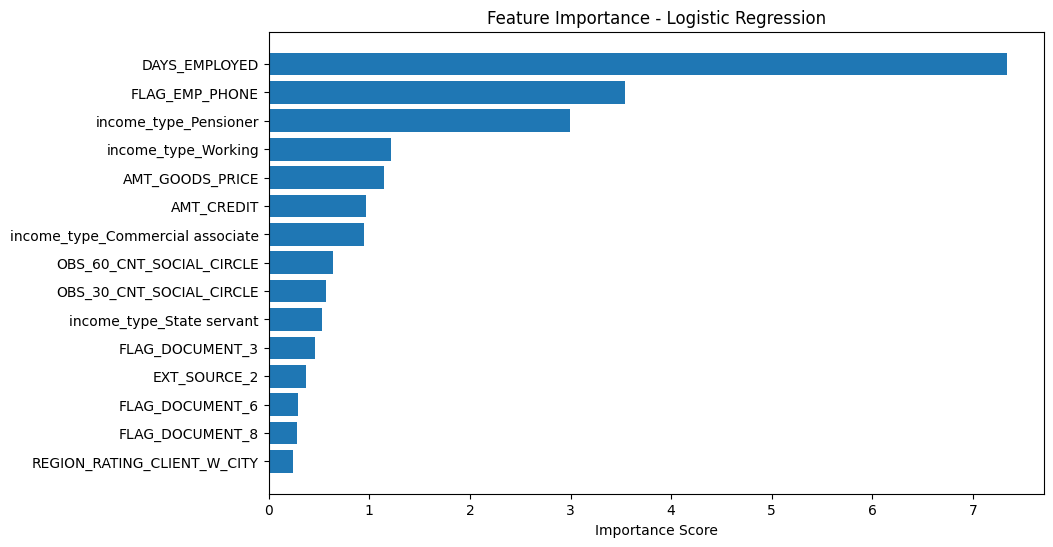

In [62]:
logreg = LogisticRegression(random_state=42) 
logreg.fit(X_train, y_train) 


feature_importance = abs(logreg.coef_[0])


# Buat DataFrame untuk lebih mudah visualisasi
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Urutkan DataFrame berdasarkan nilai importance secara menurun
importance_df = importance_df.sort_values(by='Importance', ascending=True)
importance_df = importance_df.tail(15)

# Tampilkan feature importance
print(importance_df)

# Visualisasikan feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance - Logistic Regression')
plt.show()